# Retrieval of the TOA Reflectance from the MYD02HKM data

The SARA is based on the satellite received spectral reflectance (ρλ), which is a function of measured spectral radiance $L_{TOA_λ}$, solar zenith angle, earth–sun distance in astronomical unit and mean solar exoatmospheric radiation (Eq. 1):

$\rho_{TOA(\lambda)} = \frac{\pi L_{TOA(\lambda)}d^2}{ESUN_{\lambda}\mu_s}$

where $\rho_{TOA(\lambda)}$ = satellite received TOA spectral reflectance, $L_{TOA(\lambda)}$ = satellite received TOA spectral radiance, $ESUN_{\lambda}$ = mean solar exoatmospheric radiation radiation as a function of MODIS band number. For MODIS band 4, the $ESUN_{\lambda}$ value is 1850 (*Tasumi et al., 2008*). $μ_s$ = cosine of solar zenith angle.

Parameter $d^2$ can be calculated as a function of day of year using Duffie and Beckman 􏰀1991􏰁 (Eq. 2):

$d^2 = \frac{1}{1+0.033 \cos(DOY\cdot 2\pi /365)}$

where $DOY$ = day of year and $DOY·2/365$ in (rad)


In [5]:
%matplotlib inline
import readData as rd
import readData2 as rd2
import math
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

## Load Data

In [6]:
# MYD02HKM = rd.read_data3('MYD02HKM')
# MYD03 = rd.read_data('MYD03')
# MYD02_E_LUTs = rd.read_data('MYD02_Emissive_LUTs', LUT_mode=True)
# MYD02_R_LUTs = rd.read_data('MYD02_Reflective_LUTs', LUT_mode=True)
# MYD02_Q_LUTs = rd.read_data('MYD02_QA_LUTs', LUT_mode=True)
# MYD09GA = rd.read_data('MYD09GA')

MYD02HKM = rd.read_MYD02(4)
MYD02HKM_para = rd.read_parameters_from_MYD02_HDF()

MYD02HKM/Selection/MYD02HKM.A2019298.2045.061.2019299151631.pssgrpgs_000501393049.EV_500_RefSB_2-EV_500_RefSB.tif
MYD02HKM/Selection/MYD02HKM.A2019299.2130.061.2019300153603.pssgrpgs_000501393049.EV_500_RefSB_2-EV_500_RefSB.tif
MYD02HKM/Selection/MYD02HKM.A2019299.2125.061.2019300153403.pssgrpgs_000501393049.EV_500_RefSB_2-EV_500_RefSB.tif
MYD02HKM/Selection/MYD02HKM.A2019302.2020.061.2019303155337.pssgrpgs_000501393049.EV_500_RefSB_2-EV_500_RefSB.tif
MYD02HKM/Selection/MYD02HKM.A2019300.2035.061.2019301152322.pssgrpgs_000501393049.EV_500_RefSB_2-EV_500_RefSB.tif
MYD02HKM/Selection/MYD02HKM.A2019306.2135.061.2019307150842.pssgrpgs_000501393049.EV_500_RefSB_2-EV_500_RefSB.tif
MYD02HKM/Selection/MYD02HKM.A2019305.2050.061.2019306151402.pssgrpgs_000501393049.EV_500_RefSB_2-EV_500_RefSB.tif
MYD02HKM/Selection/MYD02HKM.A2019304.2145.061.2019305151204.pssgrpgs_000501393049.EV_500_RefSB_2-EV_500_RefSB.tif
MYD02HKM/Selection/MYD02HKM.A2019307.2040.061.2019308152443.pssgrpgs_000501393049.EV_500

In [7]:
# print('--- MYD02 Reflective LUTs ---')
# for item in MYD02_R_LUTs[0]['dataset_list']:
#     print(item[1])

According to the LUT provided by the MODIS Characterization Support Team (MCST), the data in scaled integer bands should be converted. 

For MODIS band 4, the values of the DN are scaled from \[0, 4095\] to \[0, 32767]. In this regard, we need to covert the data back to its correct values. 

In [8]:
# data02 = MYD02HKM[3]['data']
# lon = MYD02HKM[0]['lon']
# lat = MYD02HKM[0]['lat']
year = MYD02HKM[3]['year']
dofy = MYD02HKM[3]['dofy']
hour = MYD02HKM[3]['hour']
minute = MYD02HKM[3]['minute']


## Importing Geolocation information in MYD03 dataset

NYD03 data provides geolocation information for MODIS products. We need to select the matching MYD03 data and make them align with the MYD02 dataset for convenience in processing. 

In [9]:
sensorAzimuth, senAzFile = rd.read_MYD03(year, dofy, hour, minute, 'SensorAzimuth')
sensorZenith, senZnFile = rd.read_MYD03(year, dofy, hour, minute, 'SensorZenith')
solarAzimuth, solAzFile = rd.read_MYD03(year, dofy, hour, minute, 'SolarAzimuth')
solarZenith, solZnFile = rd.read_MYD03(year, dofy, hour, minute, 'SolarZenith')

rd.alignRaster(MYD02HKM[3]['data'], sensorAzimuth, 
               'MYD03/MYD03_SensorAzimuth/{:04d}{:03d}{:02d}{:02d}.SenAz.tif'
               .format(year, dofy, hour, minute))
rd.alignRaster(MYD02HKM[3]['data'], sensorZenith, 
               'MYD03/MYD03_SensorZenith/{:04d}{:03d}{:02d}{:02d}.SenZe.tif'
               .format(year, dofy, hour, minute))
rd.alignRaster(MYD02HKM[3]['data'], solarAzimuth, 
               'MYD03/MYD03_SolarAzimuth/{:04d}{:03d}{:02d}{:02d}.SolAz.tif'
               .format(year, dofy, hour, minute))
rd.alignRaster(MYD02HKM[3]['data'], solarZenith, 
               'MYD03/MYD03_SolarZenith/{:04d}{:03d}{:02d}{:02d}.SolZe.tif'
               .format(year, dofy, hour, minute))



# MYD02HKM = rd.preprocess_MYD02(MYD02HKM, MYD02HKM_para)

MYD03/MYD03.A2019300.2030.061.2019301151555.pssgrpgs_000501393055.SensorAzimuth-SensorAzimuth.tif
MYD03/MYD03.A2019300.2030.061.2019301151555.pssgrpgs_000501393055.SensorZenith-SensorZenith.tif
MYD03/MYD03.A2019300.2030.061.2019301151555.pssgrpgs_000501393055.SolarAzimuth-SolarAzimuth.tif
MYD03/MYD03.A2019300.2030.061.2019301151555.pssgrpgs_000501393055.SolarZenith-SolarZenith.tif


'MYD03/MYD03_SolarZenith/20193002030.SolZe.tif'

## Data Exploration

                   0
count  711954.000000
mean        0.056540
std         0.024930
min         0.026317
25%         0.037829
50%         0.048275
75%         0.067817
max         0.248934
                   0
count  711954.000000
mean        0.068917
std         0.034149
min         0.037620
25%         0.042667
50%         0.047307
75%         0.089943
max         0.292369
                   0
count  487210.000000
mean        0.131923
std         0.073974
min         0.031490
25%         0.074793
50%         0.103119
75%         0.181578
max         0.299987
                   0
count  711954.000000
mean        0.059915
std         0.031154
min         0.033164
25%         0.036702
50%         0.040617
75%         0.077006
max         0.247303
                   0
count  711954.000000
mean        0.074784
std         0.019318
min         0.036308
25%         0.062443
50%         0.069486
75%         0.079001
max         0.236032
                   0
count  711951.000000
mean        0

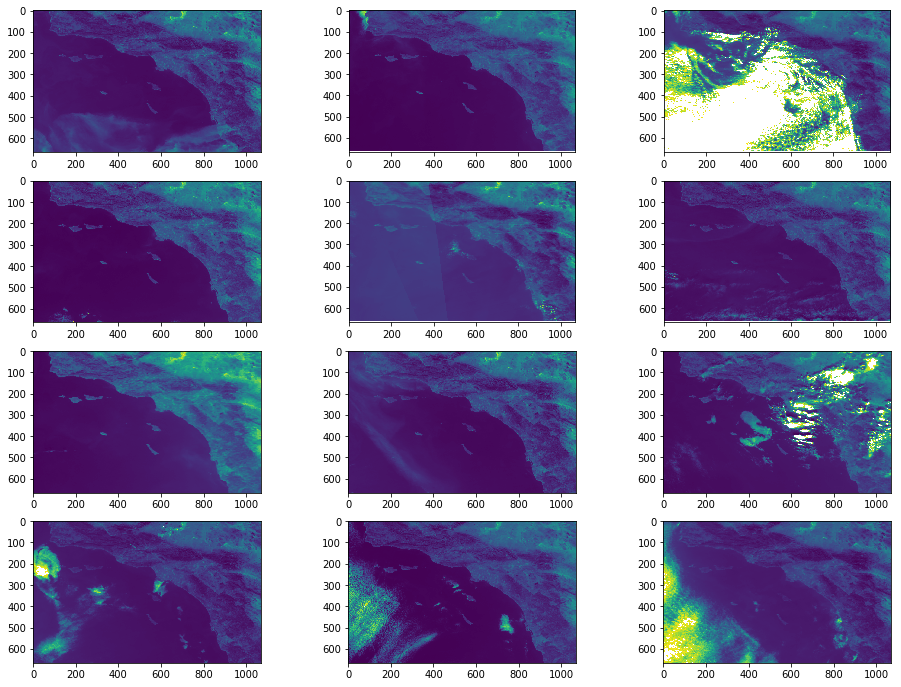

In [10]:
import readData as rd
import readData2 as rd2
import math
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))
for i in range(298,310):
    myd02matrix = rd2.read_myd02(i).ReadAsArray()
    myd02matrix = np.ma.masked_where(myd02matrix < 0, myd02matrix)
    myd02matrix = np.ma.masked_where(myd02matrix > 0.3, myd02matrix)
    i = i - 298
    ax[int(i/3), int(i%3)].imshow(myd02matrix)
    rd.show_descriptives(myd02matrix)

In [11]:
def show_histogram_myd02(i):
    myd02matrix = rd2.read_myd02(i).ReadAsArray()
    myd02matrix = np.ma.masked_where(myd02matrix < 0, myd02matrix)
    myd02matrix = np.ma.masked_where(myd02matrix > 0.3, myd02matrix)
    rd.show_histogram(myd02matrix, masked=True)

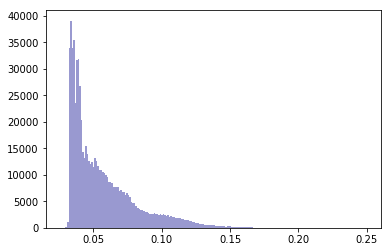

In [18]:
show_histogram_myd02(298)


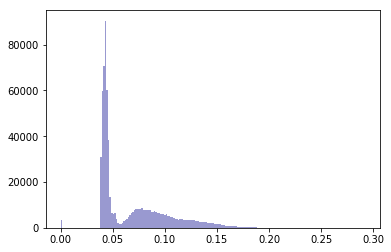

In [19]:
show_histogram_myd02(299)

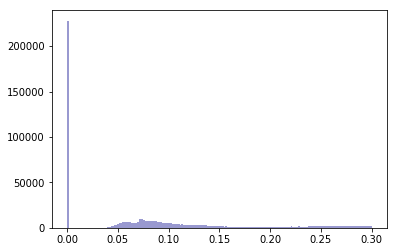

In [20]:
show_histogram_myd02(300)

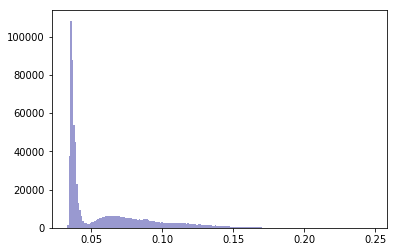

In [17]:
show_histogram_myd02(301)

In [13]:
d2 = 2 * math.pi * dofy / 365
d2 = 0.033 * math.cos(d2) + 1
d2 = 1 / d2
print("d^2 = ", d2)
ESUN = 1850
print('ESUN = ', ESUN)


d^2 =  0.98579519337378
ESUN =  1850


In [14]:
# rho_TOA = math.pi * data02 * d2 / (ESUN * µ_s)
# rd.show_histogram(rho_TOA)

In [15]:
# plt.imshow(rho_TOA)
# plt.colorbar()

# Rayleigh Reflectance

### **Calculating the scattering Angle**

According to [Levy et. al](https://doi.org/10.1029/2006JD007811), the scattering angle could be calculated from the following function:

$\Theta = \cos^{-1} (-\cos \theta_0\cos\theta + \sin \theta_0 \sin \theta \cos \phi)$

where $θ_0$, $θ$, and $ϕ$ are the **solar zenith**, **sensor view zenith**, and **relative azimuth angles**, respectively. 
Relative azimuth could be computed by using this function:

$\phi = sensor_{az} - solar_{az} - 180$

http://oceancolor.gsfc.nasa.gov/forum/oceancolor/topic_show.pl?pid=12697;hl=scattering%20angle#pid12697

### Rayleigh Phase Function and Reflectance
The Rayleigh reflectance could be calculated from the following equation:
> Bilal, M.; Nazeer, M.; Nichol, J.E.; Bleiweiss, M.P.; Qiu, Z.; Jäkel, E.; Campbell, J.R.; Atique, L.; Huang, X.; Lolli, S. A Simplified and Robust Surface Reflectance Estimation Method (SREM) for Use over Diverse Land Surfaces Using Multi-Sensor Data. Remote Sens. 2019, 11, 1344.

$\rho_R = P_R \cdot \frac{1 - e^{-M\tau_r}}{4(\mu_s + \mu_v)}$

where M = air mass = $\frac1{\mu_s}+ \frac1{\mu_v}$, 

$\tau_r$ = Rayleigh optical depth = $0.008569\lambda^{-4}(1 + 0.0113\lambda^{-2} + 0.0013\lambda^{-4})$, $\lambda$ is in radian; 

$P_R$ is the Rayleigh phase function = $\frac{3A}{4+B}(1 + \cos^2\Theta)$;

A and B are coefficients that account for the molecular asymmetry: $A = 0.9587256,\ B = 1−A$



Batch processing for Rayleigh Reflectance

d^2 =  0.9867975866990654
ESUN =  1850
Rayleigh Optical Depth 0.09847234720729856
                  0
count  7.119540e+05
mean   3.180827e-02
std    3.349783e-07
min    3.180747e-02
25%    3.180797e-02
50%    3.180828e-02
75%    3.180854e-02
max    3.180879e-02
d^2 =  0.9862941325040683
ESUN =  1850
Rayleigh Optical Depth 0.09847234720729856
                  0
count  7.119540e+05
mean   3.180848e-02
std    4.218357e-07
min    3.180323e-02
25%    3.180814e-02
50%    3.180851e-02
75%    3.180884e-02
max    3.181186e-02
d^2 =  0.98579519337378
ESUN =  1850
Rayleigh Optical Depth 0.09847234720729856
                  0
count  7.119540e+05
mean   3.180885e-02
std    2.525047e-07
min    3.180293e-02
25%    3.180870e-02
50%    3.180890e-02
75%    3.180907e-02
max    3.181183e-02
d^2 =  0.9853009040099944
ESUN =  1850
Rayleigh Optical Depth 0.09847234720729856
                  0
count  7.119540e+05
mean   3.180749e-02
std    5.240186e-07
min    3.180653e-02
25%    3.180702e-02
50%    3.18074

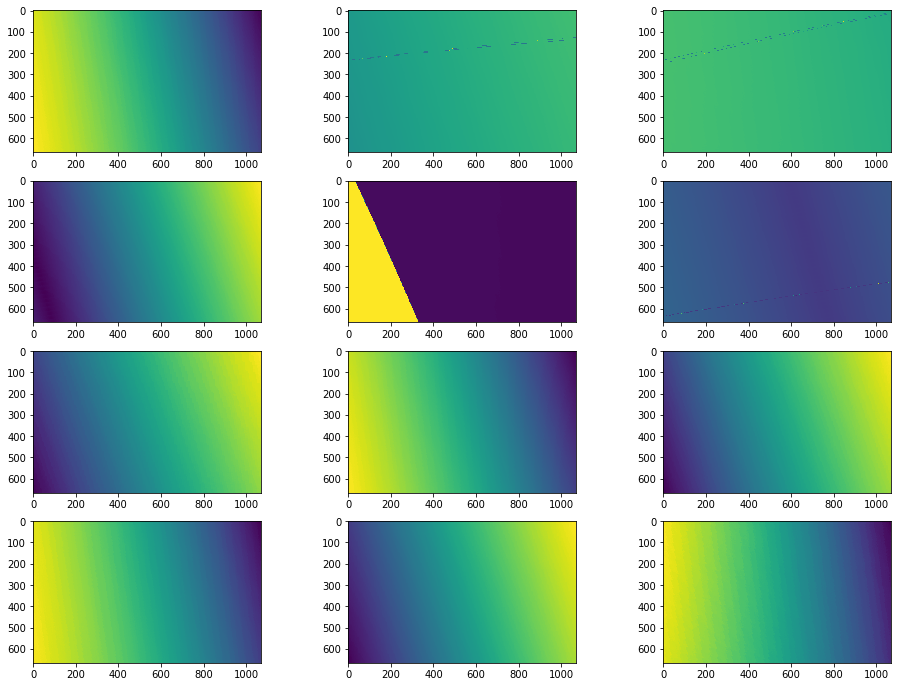

In [16]:
%matplotlib inline
import readData as rd
import readData2 as rd2
import math
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))
# fig.set_title('aa')
for i in range(298, 310):
    rho_ray = rd2.Rayleigh_Reflectance(i)
    rho_ray = np.ma.masked_where(rho_ray>0.2, rho_ray)
    rho_ray = np.ma.masked_where(rho_ray<0, rho_ray)
    i = i - 298
    ax[int(i/3), int(i%3)].imshow(rho_ray)
    rd.show_descriptives(rho_ray)
    # ax[int(i/3), int(i%3)].colorbar()


#### WEIYE CHEN
MS Student in Geography

Department of Geography and Geographic Information Science

University of Illinois at Urbana-Champaign

Urbana IL, USA

BS in Geographic Information Science, Zhejiang University, Hangzhou, China